In [49]:
# Importing libraries

import random
import matplotlib.pyplot as plt
import numpy as np

In [36]:
# Code a random dice roll

def roll_dice():
    return random.randint(1, 6)

We will be using the random module itself, as I previously mentioned, it is a pseudo random generator, but it is the easiest way to do this. 

In [37]:
# Number of intervals: 100000
n = 100000

First, let's just roll a single die a bunch of times and see what happens. We'll do this for `n=100000` times and then plot the results.

We basically want to find the probability of each outcome. We can do this by dividing the number of times we see each outcome by the total number of rolls.

## One Die

Let's try out if we can get a uniform distribution with a single die. We will use the `random` module to generate random numbers. 

In [38]:
rolls = [roll_dice() for _ in range(n)]

Now that we have all the rolls, we just calculate the number of times each value was rolled and divide by the total number of rolls to get the probability of each value.

In [39]:
sum_outcomes = np.arange(1, 7)
sum_counts = [rolls.count(sum_val) for sum_val in sum_outcomes]
sum_outcomes, sum_counts

(array([1, 2, 3, 4, 5, 6]), [16667, 16659, 16629, 16640, 16654, 16751])

In [40]:
probabilities = np.array(sum_counts) / n
probabilities

array([0.16667, 0.16659, 0.16629, 0.1664 , 0.16654, 0.16751])

If you verify and add all the probabilities, they should sum to 1.0.

In [41]:
sum(probabilities)

1.0

Now, let's plot a normal matplotlib graph and do a bunch of styling to make it look nice.

C:\Users\joshi\AppData\Local\Temp\ipykernel_16064\1593153949.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


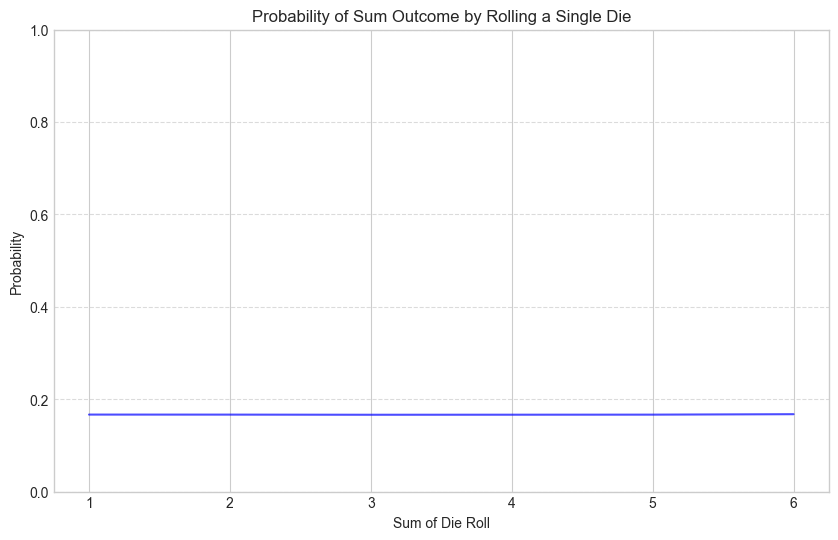

In [42]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(10, 6))
plt.plot(sum_outcomes, probabilities, color='blue', alpha=0.7)
plt.xlabel("Sum of Die Roll")
plt.ylabel("Probability")
plt.title("Probability of Sum Outcome by Rolling a Single Die")
plt.xticks(sum_outcomes)
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


As you can see, given a huge enough iterations, we get a single line that is the same as the theoretical distribution. This is because the probability of getting a 1, 2, 3, 4, 5, or 6 is the same for each roll. The more rolls we do, the closer we get to the theoretical distribution.

Now, we can't really consider a psuedo random number generator as an actual unbiased dice, hence we need to take iteartions in the order of millions to get a good enough distribution.

## Plot Distribution of Dice Rolls

Now that we have seen it with one die, let's look at the distribution for two dice. There is only slight change to the code everytime we do this, so let's write a global function that will do it for us.

In [43]:
def plot_rolls(dice, n=100000):
    rolls = [sum(random.randint(1, 6) for _ in range(dice))
             for _ in range(n)]

    sum_outcomes = np.arange(dice, dice * 6 + 1)
    sum_counts = [rolls.count(sum_val) for sum_val in sum_outcomes]

    probabilities = np.array(sum_counts) / n

    plt.style.use('seaborn-whitegrid')
    plt.figure(figsize=(10, 6))
    plt.plot(sum_outcomes, probabilities, marker='o', linestyle='-', color='b')
    plt.xlabel(f"Sum of {dice} Dice Rolls")
    plt.ylabel("Probability")
    plt.title(f"Probability of Sum Outcome by Rolling {dice} Dice")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

Now, let's analyse the distribution for a number of dice rolls and once we do this
for a number of dice rolls, we can see that the distribution starts to look more
and more like a normal distribution.

So, for example, if we do it for two

C:\Users\joshi\AppData\Local\Temp\ipykernel_16064\3907448353.py:10: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


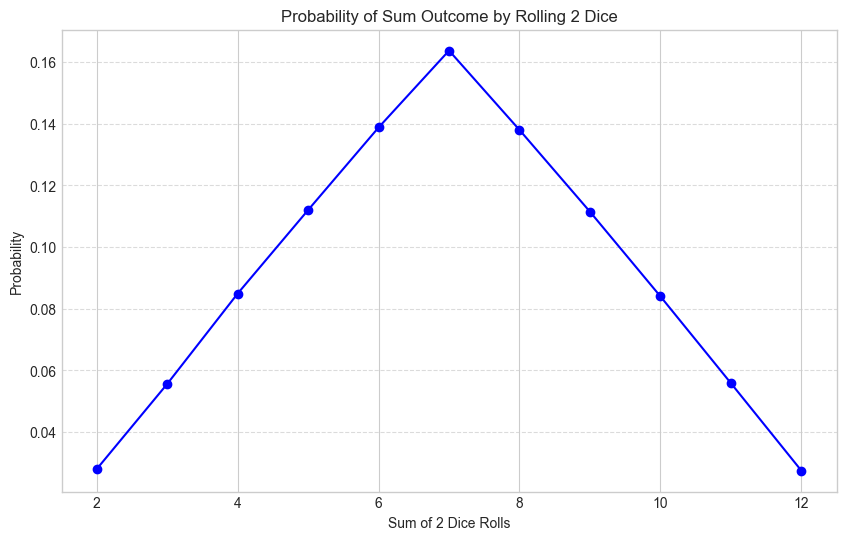

In [44]:
plot_rolls(2)

As you can see, the distribution of 2 dice has a high probability of being 7, and the probability of being 2 or 12 is very low. This is because there are many ways to get 7, but only one way to get 2 or 12. There are just so many more ways to get 7 than 2 or 12. This is why the distribution is skewed to 7.

So, now, from 3 dice, we get more and more closer to a gaussian distribution. This just consolidates the fact that the more dice you roll, the more closer you get to a gaussian distribution.

C:\Users\joshi\AppData\Local\Temp\ipykernel_16064\3907448353.py:10: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


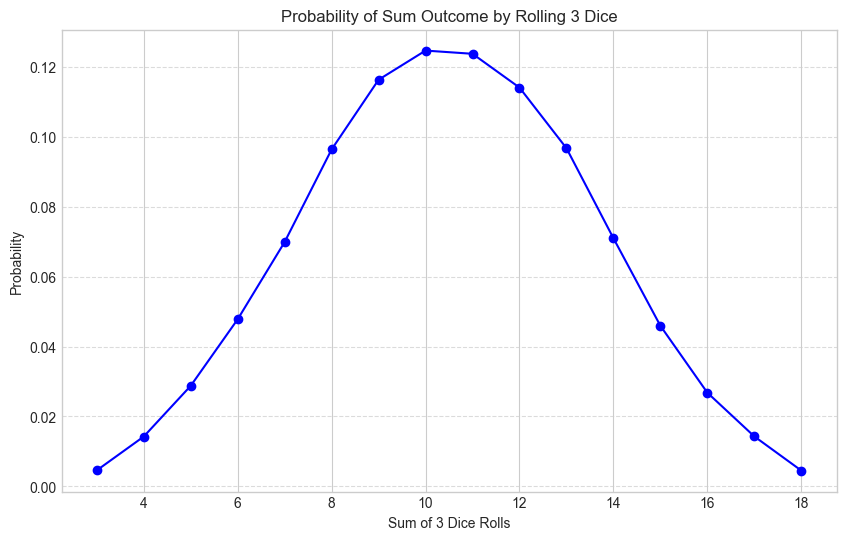

In [45]:
plot_rolls(3)

Hence, now if we want a good gaussian distribution, I think a value of 50 is good enough. Let's try it out.

C:\Users\joshi\AppData\Local\Temp\ipykernel_16064\3907448353.py:10: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


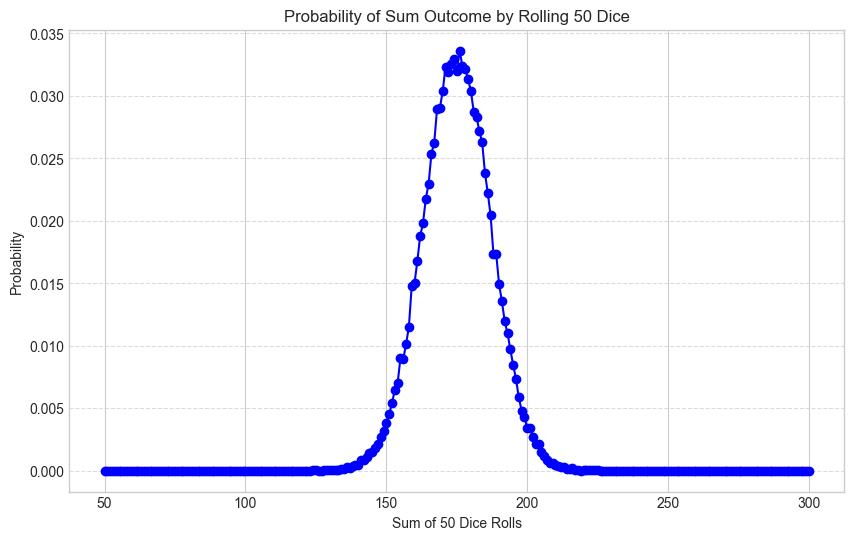

In [46]:
plot_rolls(50)

As you can see, although this might not be a true normal distribution, it is very close to one. This is because the sum of many random variables tends to be normally distributed. This is known as the central limit theorem.

Hence, essentially what we have done is to prove central limit theorem. We have shown that the sum of many random variables tends to be normally distributed.

Now, let's see how it applies to random generators.